<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1605139200&v=beta&t=opmJLG_veDflQesF9uJvIhSXbmwPY3DGSlbZo1v-w2k" width="1000"></center>

# SDC Certified Program in Python for Data Science

## Tema 1. Métodos de particionamiento: caso práctico CLARANS

### Prof. Manuel Sigüeñas, M.Sc.(c) 

[Perfil](https://socialdata-peru.com/learning/teacher2.php)

### Prof. Lenguajes de Programación para Ciencia de Datos / Agile Data Scientists / SCRUMStudy Certified Trainer


[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)

La Unidad de Inteligencia de The Economist (EIU, por sus siglas en inglés) publica desde 2006 el Índice de Democracia, una rigurosa y reconocida clasificación que pretende determinar con base en un estudio, el nivel y la calidad de la democracia en 165 estados independientes y dos territorios. Este índice se basa en cinco categorías como indicadores fundamentales: proceso electoral y pluralismo (ppelec); libertades civiles (libciv); funcionamiento del gobierno (fdelgob); participación política (partpk); y cultura política (cultpk). De acuerdo con los resultados obtenidos en su edición de 2010 (DATA CONSULTADA), se clasifica a cada país como “democracia completa”, “democracia defectuosa”, “régimen híbrido” o “régimen autoritario”.

Nosotros tomamos la referente países de latinoamérica para realizar un análisis de conglomerados que nos permita agrupar a nuestros países en función a los indicadores medidos.

In [4]:
#pip install pyclustering

In [1]:
from pyclustering.cluster.clarans import clarans;
from pyclustering.utils import timedcall;
import pyreadstat

In [4]:
filesav = 'D:/Python/2. Nivel II/2/datos/democracias_latam.sav'
df, meta = pyreadstat.read_sav(filesav )

In [5]:
df.head(20)

,tipoddem,pais,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv
0,1.0,Costa Rica,25.0,8.04,9.58,8.21,6.11,6.88,9.41
1,1.0,Uruguay,27.0,7.96,10.00,8.21,5.00,6.88,9.71
2,2.0,Argentina,54.0,6.63,8.75,5.00,5.56,5.63,8.24
3,2.0,Bolivia,81.0,5.98,8.33,5.71,4.44,3.75,7.65
4,2.0,Brazil,42.0,7.38,9.58,7.86,4.44,5.63,9.41
5,2.0,Chile,30.0,7.89,9.58,8.93,5.00,6.25,9.71
6,2.0,Colombia,67.0,6.40,9.17,4.36,5.00,4.38,9.12
7,2.0,Dom Rep,74.0,6.13,9.17,4.29,3.33,5.63,8.24
8,2.0,El Salvador,70.0,6.22,9.17,5.43,3.89,4.38,8.24
9,2.0,Guatemala,77.0,6.07,8.75,6.79,2.78,4.38,7.65


In [6]:
X = df.iloc[:, 4:].values

In [7]:
#echa un vistazo al conjunto de datos
print("Un vistazo al conjunto de datos : ",X[:3])

Un vistazo al conjunto de datos :  [[ 9.58  8.21  6.11  6.88  9.41]
 [10.    8.21  5.    6.88  9.71]
 [ 8.75  5.    5.56  5.63  8.24]]


#### Clustering algorithm CLARANS

**detalles:** cuanto mayor sea el valor de maxneighbor, más se acerca CLARANS a K-Medoids, y más larga es cada búsqueda de un mínimo local.

1. data: Datos de entrada que se presentan como una lista de puntos (objetos), cada punto debe estar representado por una lista o una tupla.
2. number_clusters: cantidad de clústeres que deberían asignarse.
3. numlocal: el número de mínimos locales obtenidos (cantidad de iteraciones para resolver el problema).
4. maxneighbor: el número máximo de vecinos examinados.        



In [8]:
import numpy as np


In [9]:
np.random.seed(2020)
clarans_instance = clarans(X, #data
                           3, #número de clúster
                           30, #cantidad de iteraciones
                           4); #máximo número de vecinos

In [10]:
np.random.seed(2020)
#llama al método clarans 'proceso' para implementar el algoritmo
(ticks, result) = timedcall(clarans_instance.process);
print("Tiempo : ", ticks, "\n");

Tiempo :  1.620210600000064 



In [11]:
np.random.seed(2020)
clusters = clarans_instance.get_clusters();
clusters

[[2, 3, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 19], [0, 1, 4, 5, 12], [16, 18]]

In [12]:
#devuelve los medoides
medoids = clarans_instance.get_medoids();

In [13]:
print("Índice de los puntos que están en un clúster : ",clusters)
print("El índice de medoides que el algoritmo encontró : ", medoids)

Índice de los puntos que están en un clúster :  [[2, 3, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 19], [0, 1, 4, 5, 12], [16, 18]]
El índice de medoides que el algoritmo encontró :  [13, 1, 16]


In [23]:
import pandas as pd
#Declarar un dataframe base
df_x = pd.DataFrame({}, 
                  columns=[])

In [15]:
clusters[0]

[2, 3, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 19]

In [16]:
clusters[1]

[0, 1, 4, 5, 12]

In [17]:
clusters[2]

[16, 18]

In [18]:
len(clusters)

3

In [24]:
for i in range (0, len(clusters)):
    df["cluster"] = None
    #df["cluster"] = m[df.A]
    dfb=df.loc[clusters[i],]
    dfb.cluster= i
    #Concatenar con el dataframe base
    df_x = pd.concat([df_x, dfb])
#Ordenar por indice    
df_x = df_x.sort_index()

In [25]:
df_x

,tipoddem,pais,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv,cluster
0,1.0,Costa Rica,25.0,8.04,9.58,8.21,6.11,6.88,9.41,1
1,1.0,Uruguay,27.0,7.96,10.00,8.21,5.00,6.88,9.71,1
2,2.0,Argentina,54.0,6.63,8.75,5.00,5.56,5.63,8.24,0
3,2.0,Bolivia,81.0,5.98,8.33,5.71,4.44,3.75,7.65,0
4,2.0,Brazil,42.0,7.38,9.58,7.86,4.44,5.63,9.41,1
5,2.0,Chile,30.0,7.89,9.58,8.93,5.00,6.25,9.71,1
6,2.0,Colombia,67.0,6.40,9.17,4.36,5.00,4.38,9.12,0
7,2.0,Dom Rep,74.0,6.13,9.17,4.29,3.33,5.63,8.24,0
8,2.0,El Salvador,70.0,6.22,9.17,5.43,3.89,4.38,8.24,0
9,2.0,Guatemala,77.0,6.07,8.75,6.79,2.78,4.38,7.65,0


#### Coeficiente de Silueta para un valor de K

In [26]:
from sklearn.metrics import euclidean_distances, silhouette_score
score = silhouette_score(X, #los valores de las Xs
                         df_x["cluster"].values) #etiquetas de grupo
score

0.41739906898917223

#### Coeficiente de Silueta para distintos valores de k

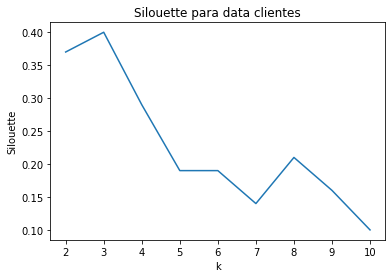

In [29]:
from sklearn.metrics import euclidean_distances, silhouette_score
import matplotlib.pyplot as plt 
from pyclustering.cluster.clarans import clarans;
from pyclustering.utils import timedcall;
sil = []

for i in range(2,11):
    #Declarar un dataframe base
    df_x = pd.DataFrame({}, 
                  columns=[])
    clarans_instance = clarans(X, i, 30,4)
    #llama al método clarans 'proceso' para implementar el algoritmo
    (ticks, result) = timedcall(clarans_instance.process);
    clusters = clarans_instance.get_clusters()
    len_cluster = len(clusters)
    #print(clarans_instance.get_clusters())
    for k in range (0, len_cluster):
        df["cluster"] = None
        dfb=df.loc[clusters[k],]
        dfb.cluster= k
        #Concatenar con el dataframe base
        df_x = pd.concat([df_x, dfb])
        #print(dfb)
    #Ordenar por indice    
    df_x = df_x.sort_index()
    #print("---------1111")
    #print(i)
    #print(df_x)
    
    score= round(silhouette_score(X, df_x["cluster"].values),2)
    sil.append(score)

plt.plot(range(2, 11),sil)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette para data clientes")
plt.show()

In [28]:
sil

[0.37, 0.4, 0.38, 0.28, 0.25, 0.11, 0.11, 0.09, 0.12]

#### para k =3

In [30]:
clarans_instance = clarans(X, 3, 6, 4);

In [31]:
(ticks, result) = timedcall(clarans_instance.process);
print("Tiempo : ", ticks, "\n");

Tiempo :  0.6656117999991693 



In [32]:
clusters = clarans_instance.get_clusters();
clusters

[[18], [0, 1, 4, 5, 12], [2, 3, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19]]

In [33]:
len(clusters)

3

In [34]:
import pandas as pd
#Declarar un dataframe base
df_x = pd.DataFrame({}, 
                  columns=[])
for i in range (0, len(clusters)):
    df["cluster"] = None
    #df["cluster"] = m[df.A]
    dfb=df.loc[clusters[i],]
    dfb.cluster= i
    #Concatenar con el dataframe base
    df_x = pd.concat([df_x, dfb])
#Ordenar por indice    
df_x = df_x.sort_index()

In [35]:
df_x

,tipoddem,pais,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv,cluster
0,1.0,Costa Rica,25.0,8.04,9.58,8.21,6.11,6.88,9.41,1
1,1.0,Uruguay,27.0,7.96,10.00,8.21,5.00,6.88,9.71,1
2,2.0,Argentina,54.0,6.63,8.75,5.00,5.56,5.63,8.24,2
3,2.0,Bolivia,81.0,5.98,8.33,5.71,4.44,3.75,7.65,2
4,2.0,Brazil,42.0,7.38,9.58,7.86,4.44,5.63,9.41,1
5,2.0,Chile,30.0,7.89,9.58,8.93,5.00,6.25,9.71,1
6,2.0,Colombia,67.0,6.40,9.17,4.36,5.00,4.38,9.12,2
7,2.0,Dom Rep,74.0,6.13,9.17,4.29,3.33,5.63,8.24,2
8,2.0,El Salvador,70.0,6.22,9.17,5.43,3.89,4.38,8.24,2
9,2.0,Guatemala,77.0,6.07,8.75,6.79,2.78,4.38,7.65,2


In [36]:
import numpy as np
import pandas as pd
def obt_metrics(data_new,n_clusters,n_columns,metric):#data_new:dataframe,el numero de clusters,el numero de columnas,#1 media 2 desviacion estandar
    str_columns=data_new.iloc[:, 0:n_columns].columns
    data_final = pd.DataFrame(columns=str_columns)#Los nombres de las diferentes columnas
    data_final['Cluster'] = "Cluster :"#Crear la columna Cluster
    
    for i in range(0,n_clusters):#Recorremos cada cluster
        #print(i)
        #Especificar el nombre donde se encuentra el nombre de la columna de cluster
        data_new_1=data_new[data_new.cluster==i]#Agrupamos el dataframe por cada cluster
        data1=data_new_1.describe()#Obtenemos el numero,media,desviacion estandar,...,max.
        data1=data1.iloc[:, 0:n_columns]#Selecciona todas las columnas
        data1=data1.iloc[[metric],]#1 mean 2 desviacion estandar
        #print(data1)#Pintamos de cada cluster
        len_data1=len(data1.columns)#El numero de columnas
        list_row=[]#Declaramos el array
        
        for k in range(0,len_data1):#Recorremos cada columna
            name_column=data1.columns[k]#Obtenemos el nombre de cada columna
            value=data1[[name_column][0]][0]#Obtenemos el valor de la columna
            #print(name_column)
            #print(value)
            list_row.append(value)#Agregamos los valores de cada columna
            
            
        list_row.append("Cluster :"+str(i))#Agregamos la columna cluster
        data_final.loc[i-1] = list_row#Agregamos una fila al dataframe final
        
        #print("---------------------------")
    return data_final

#### media

In [37]:
data_varimp = df_x.iloc[:,4:10]
data_varimp

,ppelec,fdelgob,partpk,cultpk,libciv,cluster
0,9.58,8.21,6.11,6.88,9.41,1
1,10.00,8.21,5.00,6.88,9.71,1
2,8.75,5.00,5.56,5.63,8.24,2
3,8.33,5.71,4.44,3.75,7.65,2
4,9.58,7.86,4.44,5.63,9.41,1
5,9.58,8.93,5.00,6.25,9.71,1
6,9.17,4.36,5.00,4.38,9.12,2
7,9.17,4.29,3.33,5.63,8.24,2
8,9.17,5.43,3.89,4.38,8.24,2
9,8.75,6.79,2.78,4.38,7.65,2


In [38]:
len(clusters)

3

In [39]:
#data_new:dataframe,el numero de clusters,el numero de columnas,#1 media, 2 desviacion estandar
data_final=obt_metrics(data_varimp,len(clusters),5,1)

In [40]:
data_final

,ppelec,fdelgob,partpk,cultpk,libciv,Cluster
-1,1.750000,4.640,3.890,4.380000,2.940000,Cluster :0
0,9.664000,8.070,5.222,6.254000,9.412000,Cluster :1
1,8.267857,4.975,4.405,4.422143,7.774286,Cluster :2


#### desviación estándar

In [43]:
#data_new:dataframe,el numero de clusters,el numero de columnas,#1 media, 2 desviacion estandar
data_final2=obt_metrics(data_varimp,len(clusters),5,2)

In [44]:
data_final2

,ppelec,fdelgob,partpk,cultpk,libciv,Cluster
-1,NaN,NaN,NaN,NaN,NaN,Cluster :0
0,0.187830,0.649577,0.634996,0.625004,0.363346,Cluster :1
1,0.981531,1.096124,1.010649,0.899933,0.862436,Cluster :2


#### Perfilamiento 

In [45]:
grouped_km = data_varimp.groupby(['cluster']).mean().round(1)#Obtener la media de acuerdo a cada cluster
grouped_km

,ppelec,fdelgob,partpk,cultpk,libciv
cluster,,,,,
0,1.8,4.6,3.9,4.4,2.9
1,9.7,8.1,5.2,6.3,9.4
2,8.3,5.0,4.4,4.4,7.8
